## Import libraries

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Read the file

In [354]:
df = pd.read_csv('/Users/nicolasdemuynck/BeCode/Github/Life Expectancy Data.csv')
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data preprocessing

### Replace null values with either mean or 'Unknown'

In [355]:
df.info() #null values are integers or floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [356]:
df.isnull().sum() #sum of null values per category

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [357]:
round((df.isnull().sum()*100)/len(df),2) #25% - 30% is allowed

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
 BMI                                1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
 HIV/AIDS                           0.00
GDP                                15.25
Population                         22.19
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [358]:
df.mean() #show mean

Year                               2.007519e+03
Life expectancy                    6.922493e+01
Adult Mortality                    1.647964e+02
infant deaths                      3.030395e+01
Alcohol                            4.602861e+00
percentage expenditure             7.382513e+02
Hepatitis B                        8.094046e+01
Measles                            2.419592e+03
 BMI                               3.832125e+01
under-five deaths                  4.203574e+01
Polio                              8.255019e+01
Total expenditure                  5.938190e+00
Diphtheria                         8.232408e+01
 HIV/AIDS                          1.742103e+00
GDP                                7.483158e+03
Population                         1.275338e+07
 thinness  1-19 years              4.839704e+00
 thinness 5-9 years                4.870317e+00
Income composition of resources    6.275511e-01
Schooling                          1.199279e+01
dtype: float64

In [359]:
df=df.fillna(df.mean()) # replace all null values with column mean
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [360]:
df.isnull().sum() #check if there are any null values left

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Encode categorical variabels

In [361]:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].str.upper()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,AFGHANISTAN,2015,DEVELOPING,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,AFGHANISTAN,2014,DEVELOPING,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,AFGHANISTAN,2013,DEVELOPING,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,AFGHANISTAN,2012,DEVELOPING,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,AFGHANISTAN,2011,DEVELOPING,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [362]:
df.Country.unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA',
       'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA (PLURINATIONAL STATE OF)', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM', 'BULGARIA',
       'BURKINA FASO', 'BURUNDI', "CÔTE D'IVOIRE", 'CABO VERDE',
       'CAMBODIA', 'CAMEROON', 'CANADA', 'CENTRAL AFRICAN REPUBLIC',
       'CHAD', 'CHILE', 'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO',
       'COOK ISLANDS', 'COSTA RICA', 'CROATIA', 'CUBA', 'CYPRUS',
       'CZECHIA', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA",
       'DEMOCRATIC REPUBLIC OF THE CONGO', 'DENMARK', 'DJIBOUTI',
       'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON', 'GAMBIA',
       'GEORGIA', 'GERMANY'

In [363]:
df.Status.unique()

array(['DEVELOPING', 'DEVELOPED'], dtype=object)

In [364]:
encoder = LabelEncoder ()

for i in df.columns:
    if df[i].dtype == object:
        df[i] = encoder.fit_transform(df[i])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [365]:
df.Country.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [366]:
df.Status.unique()

array([1, 0])

## Narrow down the dataframe (scope of the challenge)

### Narrow down the amount columns and rows

In [367]:
df1 = df.iloc[:, 0:4]
df1

,Country,Year,Status,Life expectancy
0,0,2015,1,65.0
1,0,2014,1,59.9
2,0,2013,1,59.9
3,0,2012,1,59.5
4,0,2011,1,59.2
...,...,...,...,...
2933,192,2004,1,44.3
2934,192,2003,1,44.5
2935,192,2002,1,44.8
2936,192,2001,1,45.3


In [368]:
del df1['Status']

In [369]:
df1

,Country,Year,Life expectancy
0,0,2015,65.0
1,0,2014,59.9
2,0,2013,59.9
3,0,2012,59.5
4,0,2011,59.2
...,...,...,...
2933,192,2004,44.3
2934,192,2003,44.5
2935,192,2002,44.8
2936,192,2001,45.3


In [370]:
five = df1.loc[df1['Country'] <=15]
five.tail(5)

,Country,Year,Life expectancy
251,15,2004,78.8
252,15,2003,78.3
253,15,2002,78.0
254,15,2001,78.0
255,15,2000,77.6


In [371]:
five.columns = ['Country', 'Year', 'Life']
five.head(5)

,Country,Year,Life
0,0,2015,65.0
1,0,2014,59.9
2,0,2013,59.9
3,0,2012,59.5
4,0,2011,59.2


### Create 5 new variables per country

In [372]:
zero = five.loc[five['Country'] == 0]
one = five.loc[five['Country'] == 1]
two = five.loc[five['Country'] == 2]
three = five.loc[five['Country'] == 3]
four = five.loc[five['Country'] == 4]
five = five.loc[five['Country'] == 15]

zero = zero[['Year', 'Life']]
one = one[['Year', 'Life']]
two = two[['Year', 'Life']]
three = three[['Year', 'Life']]
four = four[['Year', 'Life']]
five = four[['Year', 'Life']]

## Data visualizations per country

### Timeserie per country

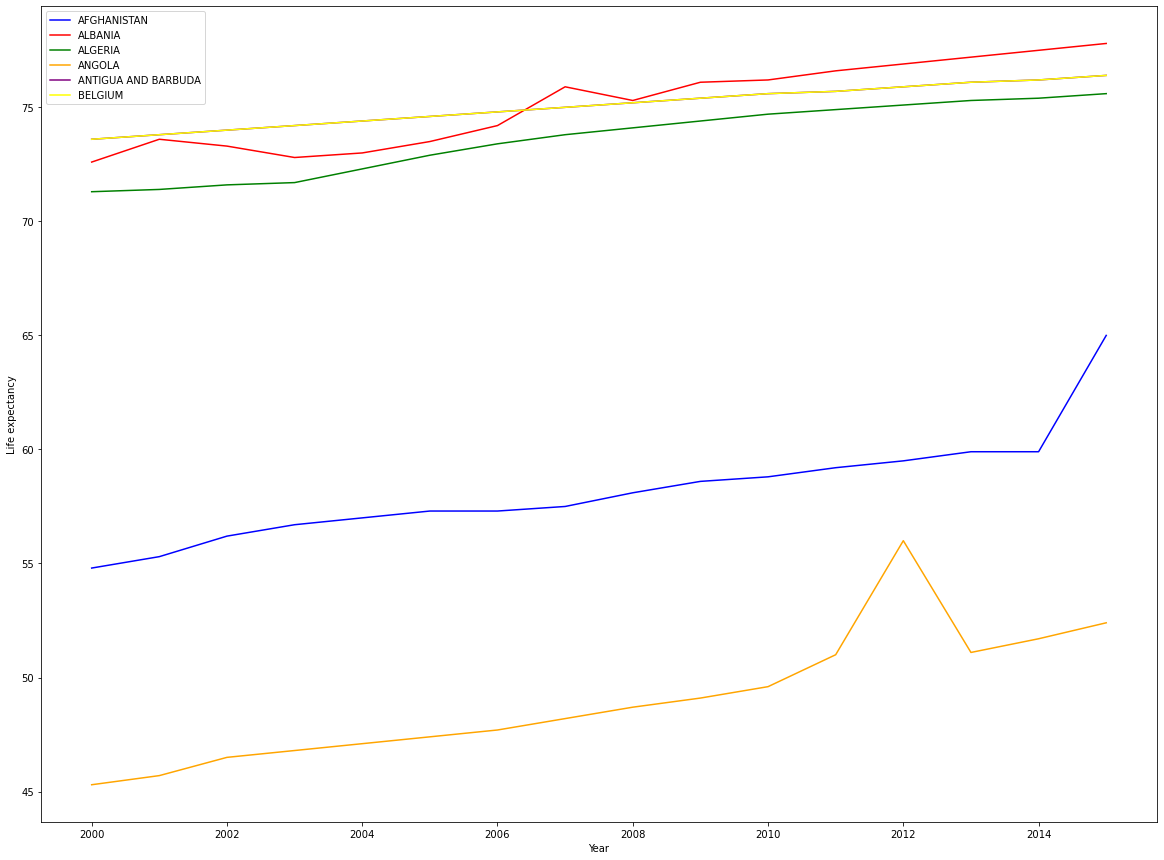

In [373]:
plt.figure(figsize = (20,15))

plt.plot(zero.Year, zero.Life, label = 'AFGHANISTAN', c = 'b' )
plt.plot(one.Year, one.Life, label = 'ALBANIA', c = 'r' )
plt.plot(two.Year, two.Life, label = 'ALGERIA', c = 'g' )
plt.plot(three.Year, three.Life, label = 'ANGOLA', c = 'orange' )
plt.plot(four.Year, four.Life, label = 'ANTIGUA AND BARBUDA', c = 'purple' )
plt.plot(five.Year, five.Life, label = 'BELGIUM', c = 'yellow' )

plt.xlabel('Year')
plt.ylabel('Life expectancy')

plt.legend()
plt.show()

# Life expectancy for every country is rising through out the years
# Simple linear regression will be a good model for predicitions later on
# The life expectancy from Albanians is the highest after mid 2006
# Before mid 2006 Belgians had the highest life expectancy
# The life expectancy from Angolians the lowest, followed by inhabitants of Afghanistan

### Histogram per country

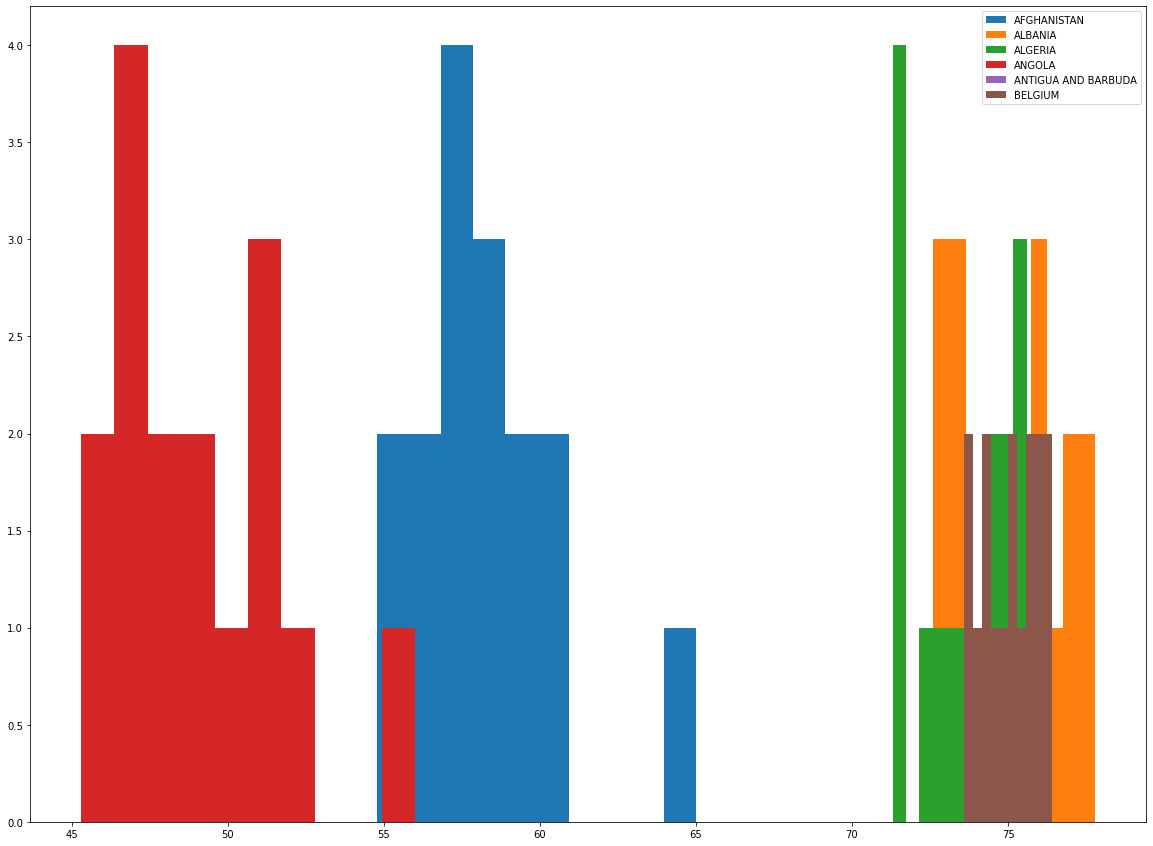

In [374]:
plt.figure(figsize = (20,15))

plt.hist(zero.Life, label = 'AFGHANISTAN')
plt.hist(one.Life, label = 'ALBANIA')
plt.hist(two.Life, label = 'ALGERIA')
plt.hist(three.Life, label = 'ANGOLA')
plt.hist(four.Life,label = 'ANTIGUA AND BARBUDA')
plt.hist(five.Life,label = 'BELGIUM')

plt.legend()

plt.show()

# Histograms from countries with a life expectancy >70 y/o are normally distributed
# Histograms from countries with a life expectancy <70 y/o are right skewed

## Make predictions for the year 2100 for every country

### Write a function for our prediction

In [338]:
def predict_life_exp(country):
    x = country.Year.values
    x = np.reshape(x, (-1, 1))
    y = country.Life.values
    y = np.reshape (y, (-1, 1))
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/5, random_state = 0)
    
    linearRegressor = LinearRegression()
    linearRegressor.fit(xtrain, ytrain)
    print('The number of correct predictions that our model was able to make:')
    print(linearRegressor.score(xtrain, ytrain))
    
    yprediction = linearRegressor.predict(xtest)
    print('Overall score of our model:')
    print(linearRegressor.score(xtest, ytest))
    
    plt.scatter(xtrain, ytrain, color = 'red')
    plt.plot(xtrain, linearRegressor.predict(xtrain), color = 'blue')
    plt.title('Predict life expectancy based on training data')
    plt.xlabel('Years')
    plt.ylabel('Life expectancy')
    plt.show()
    
    plt.scatter(xtest, ytest, color = 'red')
    plt.plot(xtest, linearRegressor.predict(xtest), color = 'blue')
    plt.title('Predict life expectancy based on test data')
    plt.xlabel('Years')
    plt.ylabel('Life expectancy')
    plt.show()
    
    xnew = [[2100]]
    ynew = linearRegressor.predict(xnew)
    print('The life expectancy in the year 2100 will be:')
    print(ynew)

### Country 1: Afghanistan

The number of correct predictions that our model was able to make:
0.8310571490888568
Overall score of our model:
0.2004508307825449


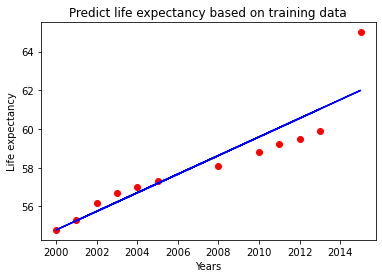

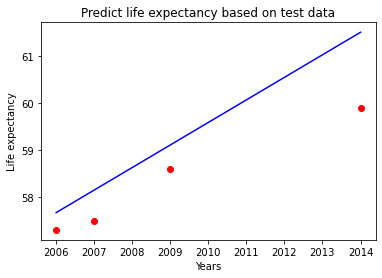

The life expectancy in the year 2100 will be:
[[102.85413793]]


In [339]:
predict_life_exp(zero) #model is very much overfitting

### Country 2: Albania

The number of correct predictions that our model was able to make:
0.9391218237401782
Overall score of our model:
0.7586616648474027


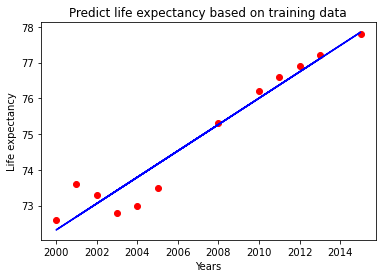

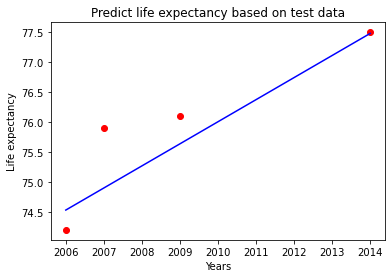

The life expectancy in the year 2100 will be:
[[109.18172414]]


In [341]:
predict_life_exp(one) #model is a bit overfitting

### Country 3: Algeria

The number of correct predictions that our model was able to make:
0.9775266446990561
Overall score of our model:
0.7981441167106657


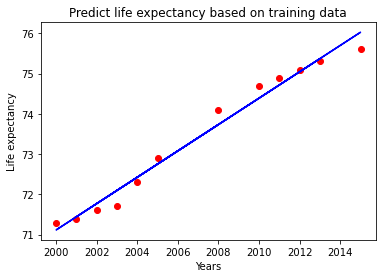

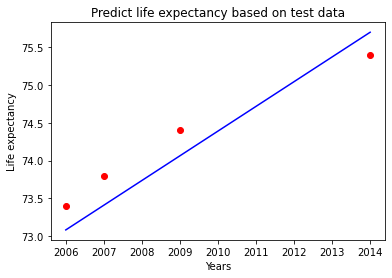

The life expectancy in the year 2100 will be:
[[103.84178161]]


In [342]:
predict_life_exp(two) #model is a bit overfitting

### Country 4: Angola

The number of correct predictions that our model was able to make:
0.7954996972658794
Overall score of our model:
0.6500971234682691


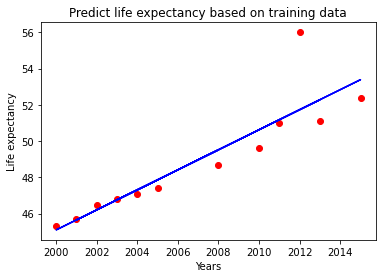

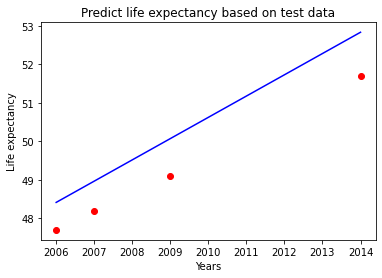

The life expectancy in the year 2100 will be:
[[100.34114943]]


In [344]:
predict_life_exp(three) #model is a bit overfitting

### Country 5: Antigua and Barbuda

The number of correct predictions that our model was able to make:
0.9984601326748368
Overall score of our model:
0.9881359205454725


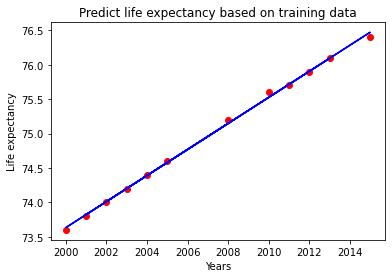

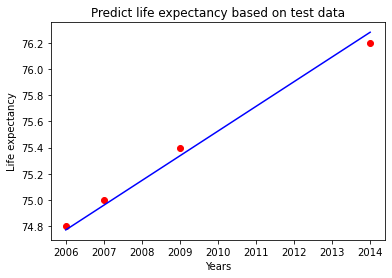

The life expectancy in the year 2100 will be:
[[92.5641954]]


In [345]:
predict_life_exp(four) # good model

### Country 6: Belgium

The number of correct predictions that our model was able to make:
0.9984601326748368
Overall score of our model:
0.9881359205454725


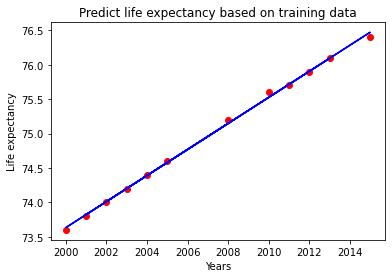

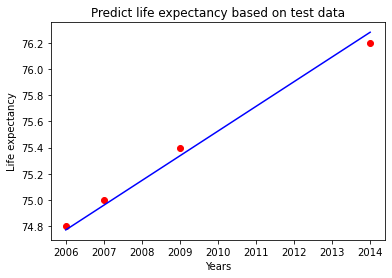

The life expectancy in the year 2100 will be:
[[92.5641954]]


In [376]:
predict_life_exp(five) # good model